In [134]:
import pandas as pd
import geopandas as gpd
import glob
import re
%matplotlib inline

## Get the list of file names

In [135]:
big_roundabouts_filenames = glob.glob("./OSM data/polygons/cleaned-*.geojson")
small_roundabouts_filenames = glob.glob("./OSM data/points/singleparts-*.geojson")

## Turn those into a list of dataframes

In [136]:
big_roundabouts_dfs = [gpd.read_file(f) for f in big_roundabouts_filenames]
small_roundabouts_dfs = [gpd.read_file(f) for f in small_roundabouts_filenames]

## Add the canton's name to each dataframe

In [137]:
for dataframe, filename in zip(big_roundabouts_dfs, big_roundabouts_filenames):
  dataframe['canton'] = re.findall("buffer-([^\s]+)", filename)[0]
    
for dataframe, filename in zip(small_roundabouts_dfs, small_roundabouts_filenames):
  dataframe['canton'] = re.findall("buffer-([^\s]+)", filename)[0]

## Add the type of each roundabout

In [138]:
for df in small_roundabouts_dfs:
    df["mini_roundabout"] = True
    
for df in big_roundabouts_dfs:
    df["mini_roundabout"] = False

In [139]:
small_roundabouts_dfs[0].head()

,ID,geometry,canton,mini_roundabout
0,0,"POLYGON ((358816.9188046959 5254207.012753255,...",jura,True
1,1,"POLYGON ((374341.0126722155 5245568.314472191,...",jura,True
2,2,"POLYGON ((355170.5460184894 5253737.834250424,...",jura,True
3,3,"POLYGON ((355112.9577420084 5253762.663368664,...",jura,True
4,4,"POLYGON ((348984.3435450751 5250623.196992285,...",jura,True


In [140]:
big_roundabouts_dfs[0].head()

,ID,geometry,canton,mini_roundabout
0,0,"POLYGON ((8.274727983906008 46.9474536483493, ...",obwald,False
1,1,"POLYGON ((8.270112773713345 46.93781410532457,...",obwald,False
2,2,"POLYGON ((8.275610335338715 46.93612074383902,...",obwald,False
3,3,"POLYGON ((8.273166289781191 46.90133781740725,...",obwald,False
4,4,"POLYGON ((8.275385069055552 46.90069110547771,...",obwald,False


## Combine the dataframes

In [141]:
# EPSG: 4326
df_small_roundabouts = pd.concat(small_roundabouts_dfs, ignore_index=True)
# EPSG: 32632
df_big_roundabouts = pd.concat(big_roundabouts_dfs, ignore_index=True)

### Set the same CRS to the two dataframes

In [142]:
df_big_roundabouts = df_big_roundabouts.to_crs(df_small_roundabouts.crs)

### Combine the roundabouts and mini-roundabouts

In [143]:
df_roundabouts = pd.concat([df_small_roundabouts, df_big_roundabouts], ignore_index=True)

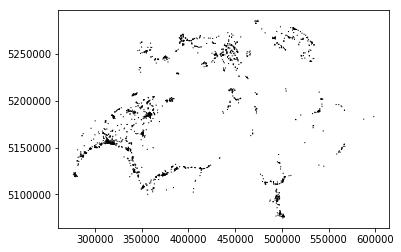

In [144]:
df_roundabouts.plot()

## Save the result

In [147]:
df_roundabouts.drop("ID", axis=1, inplace=True)

In [148]:
with open("ch_roundabouts.geojson", "w") as f:
    f.write(df_roundabouts.to_json())